# Analyzing Romer's RBC model
\usepackage{ amssymb }

In this assignment we will analyze a standard RBC model presented by David Romer, starting by looking at the utility function in 1 period, thereafter looking at a simple static model and in the end a 2-period model. 

We will throughout the analysis assume the households have the following utility function:

$u(C_t, L_t) = \dfrac{C_t^{(1-\theta)}-1}{1-\theta} + b \bigg(\dfrac{(1-L_t)^{1-\omega}-1}{1-\omega}\bigg)$

Where C is consumption and L is labor (which has been normalized to 1). The parameters are as follows:

- $\theta$: Greater than 0 and less than 1, and describes the relative risk aversion for the individual. 
- $\omega$: Greater than 0 and less than 1, and describes the inversee intertemporal elasticity of substitution between period 1 and period 2 for the individual. 
- b: Greater than 0, controls importance for leisure. 

In the case where $\theta = \omega = 1$ the utility function will be defined as the following to avoid division by zero: 

$u(C_t, L_t) = ln(C_t) + b*ln(1-L_t)$

The lagrangian is therefore: 

$\mathcal{L} = ln(C) + bln(1-L) + \lambda(wL - C)$

We will now start by defining the utility function described above: 


In [1]:
# %load Modelproject.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg, interpolate, io

#Write explaination and equations for the utility function defined
#by consumption and lesisure by Romer. 

def u(C, L): #Defining the utility function
    if theta == 1.0:
        consumption = np.log(C) #This is a condition of the simple utility flow model. 
    else:
        consumption = (C**(1-theta)-1/(1-theta))

    if omega == 1.0:
        leisure = np.log(1-L)  #This is a condition of the simple utility flow model. 
    else:
        leisure = ((1-L)**(1-omega)-1/(1-omega))

    #Flow utility is defined as:
    utility = consumption + b*leisure

    return utility

b, omega, theta = 3.0, 1.0, 1.0 #set some parameter values

u(np.exp(1),0) #Checking if the function is working properly. If result is 1, it works!

1.0

We have chosen to set some initial parameter values to test whether the function we define works or not. As the result of the above comes out as 1, it shows the function is indeed working as intended. 

We will now create a 3 dimensional plot of the relationship between consumption and labor, while also showing the utility on the 3rd axis.

In [2]:
#We will now plot the utility function we just found defined, in a 3-dimensional plot:

#create the plot
%matplotlib widget

fig = plt.figure(figsize=(10,6))

# create a 3D Axes object
ax = fig.gca(projection='3d', elev=30, azim=310)

#Grid of (x,y) values which we will pass to function
consumption = np.linspace(0, 20, 200)
labor = np.linspace(0, 1, 20)
L, C = np.meshgrid(labor, consumption)

#Parameter values
b, theta, omega = 2.0, 0.2, 0.2


#We define utility as the function we made earlier. 
utility = u(C, L)

#Plot surface
utility_surface = ax.plot_surface(L, C, utility, rstride=1, cstride=1, cmap=mpl.cm.terrain, 
                                  linewidth=0, vmin=-2, vmax=np.max(utility), 
                                  antialiased=False)

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 20)
ax.set_xlabel(r"Labor, $L_{t}$", fontsize=15, family="serif")
ax.set_ylabel(r"Consumption, $C_{t}$", fontsize=15, family="serif")
ax.set_zlabel(r"Utility, u(C, L)", fontsize=15, family="serif")
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

ax.invert_xaxis()

# display plot
plt.show()

FigureCanvasNbAgg()

The figure can be rotated to fully comprehend the dimensions.
The color depicts the utility gained at a certain spot on the graph.
The figure shows, that the utility is highly dependant on the consumption, and less dependant on the labor given the parameters for relative risk aversion ($\theta$ = 0.2), the inverse intertemporal elasticity of substitution ($\omega$ = 0.2) and the importance of leisure (b = 2).

To further understand the utility function, we inspect a 2 dimensional version of the graph above with a fixed level of labor and analyze the effect of the important of leisure (b).

We will now look at the effects of b, which shows the importance of labor, by locking consumption and leisure, risk aversion 
($\theta$) and the inverse intertemporal elasticity of substitution ($\omega$)

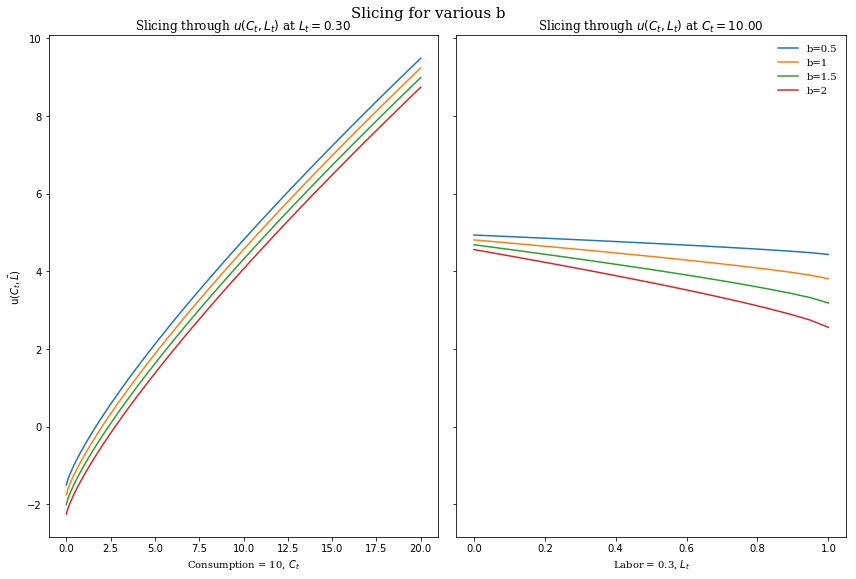

In [4]:
# Fix l_bar and c_bar
L_lock, C_lock = 0.3, 10         #Fixing specific values for labor and consumption
b, theta, omega = 1.5, 0.2, 0.2  #Picking arbitrary parameter values

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,8)) #We make the two plots share the same y-axis
ax1, ax2 = axes

for b in [0.5, 1.0, 1.5, 2.0]:
    #Here we lock leisure, and plot consumption and set leisure level while varying b
    ax1.plot(consumption, u(consumption, L_lock), label = "b=%g" %b) 

    #Axes, labels, etc
    ax1.set_xlabel("Consumption = 10, $C_t$", family="serif")
    ax1.set_ylabel(r"u$(C_t, \bar{L})$", rotation = "vertical")
    ax1.set_title("Slicing through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$" %L_lock, family="serif")

    #Next we do the same, but hold consumption locked. 
    ax2.plot(labor, u(C_lock, labor), label = "b=%g" %b)

    #Axes, labels, etc
    ax2.set_xlabel("Labor = 0.3, $L_t$", family="serif")
    ax2.set_title("Slicing through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$" %C_lock, family = "serif")

ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

plt.tight_layout()
plt.suptitle('Slicing for various b', y=1.00, fontsize=15, family='serif')
plt.show()


The parameter values for the figures above is locked on $\theta$ = 0.2 and $\omega$ = 0.2

As expected we see a positive correlation between consumption and utility and a negative correlation between labor and utility.
The utility given a fixed labor (left figure) shows that the marginal change in utility for different values of b (importance of leisure) is constant for all values of consumption. Lower b gives a lower utility.

The figure on the right depicts the relation between labor and utility, given a fixed consumption. The relation shows, that the marginal utility of labor is decreasing as b increases. This also coincides with our economic intiuition as b is the preference for leisure, and the more an individual weighs leisure, the more disutility is gained from extra labor. 

Instead of looking at the importance of leisure, we look at $\theta$, which describes the risk aversion.

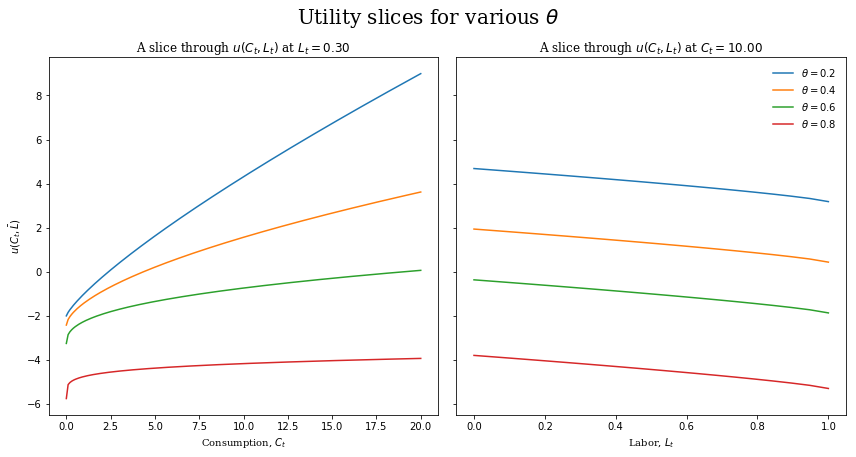

In [78]:
# Fix l_bar and c_bar
L_lock, C_lock = 0.3, 10           #Fixing specific values for labor and consumption
b, theta, omega = 1.5, 0.2, 0.2    #Picking arbitrary parameter values

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for theta in [0.2, 0.4, 0.6, 0.8]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_lock), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='vertical')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_lock,
                  family='serif')

    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax2.plot(labor, u(C_lock, labor), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_lock,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\theta$', y=1.05, fontsize=20, family='serif') 

plt.show()

#For theta we have chosen to only include 0-2 because exceeding 2.0 messes with the y-axis

When fixing labor (left graph), we see that the marginal utility is decreasing as risk aversion increases. 

When fixing consumption (right graph), we see that the marginal utility of labor is unaffected by changes in risk aversion, $\theta$, but has a lower level of utility as $\theta$ increases.

The last parameter we want to analyze is the parameter for inverse intertemporal elasticity of substitution for the individual, $\omega$.

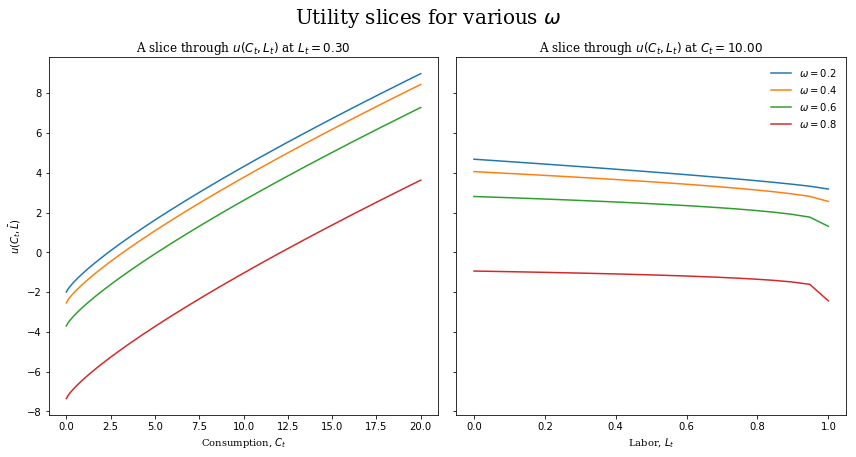

In [79]:
# Fix l_lock and c_lock
L_lock, C_lock = 0.3, 10           #Fixing specific values for labor and consumption
b, theta, omega = 1.5, 0.2, 0.2    #Picking arbitrary parameter values

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for omega in [0.2, 0.4, 0.6, 0.8]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_lock), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='vertical')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_lock,
                  family='serif')

    ax2.plot(labor, u(C_lock, labor), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_lock,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\omega$', y=1.05, fontsize=20, family='serif') 

plt.show()

As the intertemporal elasticity of substitution between leisure in period 1 and 2 increases, the level of utility is also lower for the individual. 
We should also notice, that for a consumption level close to 0 utility will approach an undefined value, as is the case when labor approaches 1. This should be clear given the definition of our utility function (see above). 

We notice a break, most noticable on the figure on the right when labor reaches 1.0. Theoretically, these functions are continous, but since we have defined our parameters of discrete numbers we see a break in the continous function when labor approaches 1, and consumption is near 0. 

We have now looked at the three different parameters using the "slicing-through"-method by fixing a parameter.



### The trade-off between leisure and consumption

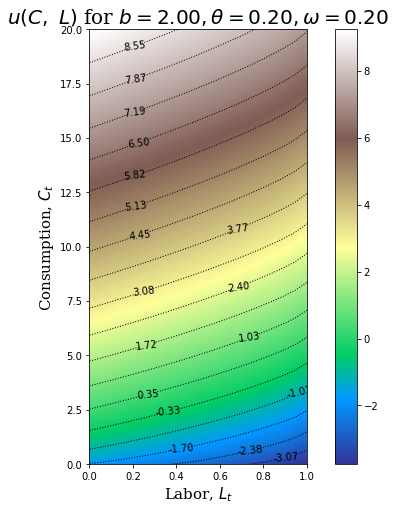

In [210]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Force logarithmic preferences!
b, theta, omega = 2.0, 0.2, 0.2     #Picking arbitrary parameter values 

# we will actually plot output
utility = u(C, L)                   #we use the function from earlier 

# create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
               vmin=np.min(utility), vmax=np.max(utility), extent=(0, 1, 0, 20), aspect=0.10)

# demarcate the contours...
CS = ax.contour(L, C, utility, np.linspace(np.min(utility), np.max(utility), 20), colors=np.repeat('k', 10), 
                linewidths=1, linestyles="dotted")
ax.clabel(CS, inline=1, fmt='%1.2f')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 20)
ax.set_xlabel(r"Labor, $L_{t}$", fontsize=15, family='serif')
ax.set_ylabel(r"Consumption, $C_{t}$", fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(im, shrink=1, aspect=20)


plt.show()

We have chosen now to keep the parameters $\theta$, $\omega$ and b fixed and thereby look at the trade-off between laber and consumption. Thereby we can see the trade-off between consumption and labor.

The figure above shows the trade-off, where the color represents the utility.
It is seen, that a high labor and low consumption gives a low utility, while a low amount of labor with a high consumption will yield a higher utility.

## Example of the static model
\usepackage{amsmath}

We will for the sake of simplicity assume $\omega = \theta = 1$ and, look at the lagrangian defined earlier which gives us the following first order conditions(wrt. C, W, and $\lambda$): 

- $\dfrac{1}{C} - \lambda = 0$
- $\dfrac{-b}{1-L} - \lambda W = 0$
- $C = W*L$



This yields the following linear equation: 
$$\quad
\begin{vmatrix} 
b & W \\
1 & -W 
\end{vmatrix}
\quad\quad
\begin{vmatrix} 
C \\
L 
\end{vmatrix}
\quad = \quad 
\begin{vmatrix}
W \\ 0 
\end{vmatrix} \quad$$

This can be solved as follows:

In [420]:
# specify some model parameters
theta, omega, b, W = 1.0, 1.0, 1.5, 20

# Define the coefficient matrix, A, and vector of dependent values, d, for our two equation system
A = np.array([[b, W], 
              [1, -W]]) 
d = np.array([[W], 
              [0]])

# Solve the system of equations and assign the optimal choices for consumption and labor
C_star, L_star = linalg.solve(A, d)[0,0], linalg.solve(A, d)[1,0] 
u_star = u(C_star, L_star)

print("Optimal choice of consumption:         ", C_star)
print("Optimal choice of labor supply:        ", L_star)
print("Utility associated with optimal bundle:", u_star)

Optimal choice of consumption:          8.000000000000002
Optimal choice of labor supply:         0.3999999999999999
Utility associated with optimal bundle: 1.3132031060308504


Above we see the optimal choices of consumption, labor and the resulting utility for the individual given the the importance of leisure = 1.5 and wage = 20.

Next we will look at how this particular bundle intercepts the budget constraint, and we will show it graphically:

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


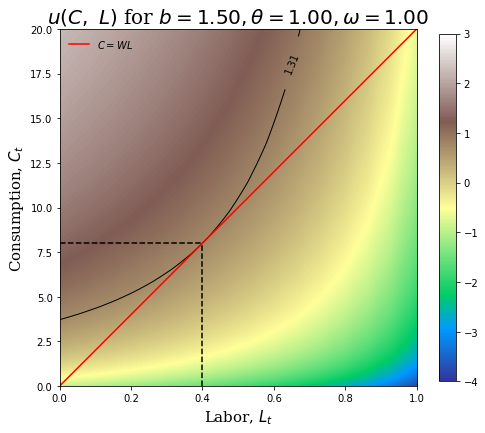

In [423]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot output
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
                vmin=-4, vmax=3, extent=(-0.1, 1.2, -1, 40), aspect=0.05)

# plot the budget constraint
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W*labor_supply, 'r-', label='$C=WL$')

# demarcate the contours...
# demarcate the indifference curve...
CS = ax.contour(L, C, utility, np.array([u_star]), colors='k', linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.2f')

# mark the optimal bundle
ax.hlines(C_star, 0, L_star, linestyle='dashed')
ax.vlines(L_star, 0, C_star, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 20)
ax.set_xlabel(r'Labor, $L_{t}$', fontsize=15, family='serif')
ax.set_ylabel(r'Consumption, $C_{t}$', fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
ax.legend(loc='best', frameon=False)

fig.colorbar(im, shrink=0.8, aspect=20)

plt.show()

We notice the error message 'Division by zero'. This is due to $\omega$ and $\theta$ being 1. However as described in the top, we have defined the function in this situation, and therefore disregard the error and continue on.

Given the values of b = 0.15 and Wage = 20, we see the utility function as the indifference curve, being 1.31, and the appropriate optimal choices along the red line. As we saw before, we numerically solved the problem and saw the optimal labor choice was 0.40 and the optimal consumption choice was 8.00 which leads to an utility of 1.31. We see the exactly same here when showing it graphically. 


## 2-period RBC model

In the static model we have just looked at above, the level of the individuals labor is unaffected by the amount of wage the individual gets. One could argue that real wages would have an effect on labor supply when the time horizon is more than one period. Therefore, we will now assume that the individual households has two periods of time and that no uncertainty about future prices exist in this model. Due to their logarithmic preferences the households will only use a fraction of their income in period 0 and the rest in period 1. Their budget constraint can therefore be written as follows:

$C_0 + \dfrac{1}{1+r_1} C_1 = W_0 L_0 + \dfrac{1}{1+r_1} W_1 L_1$

The lagrangian to this is: 

$\mathcal{L} \equiv ln(C_0) + b*ln(1-L_0) + \beta \bigg[ln(C_1) + b*ln(1-L_1)\bigg]+ \lambda \bigg[C_0 + \frac{1}{1+r_1}C_1 - W_0 L_0 - \dfrac{1}{1+r_1} W_1 L_1\bigg]$




Important notes: 

The households lifetime income is represented as: $W_0 + \dfrac{1}{1+r_1}W_1$

The labor supply has to be non-negative in each of the periods, Therefore for period t=0 the following inequality must hold: 

$\bigg(\dfrac{1}{1+r_1}\bigg)\bigg(\dfrac{W_1}{W_0}\bigg) < \bigg(\dfrac{1+b}{b}\bigg)\bigg(\dfrac{1+\beta}{\beta}\bigg) - 1$

In [434]:
# We choose arbitrary parameter values. 
b, beta, theta, omega = 1.5, 1.5, 1, 1
 
# Specify some arbitrary prices which the household will take as given. 
W0, W1, r1 = 20, 20, 0.02

# Calculate endowment given prices.
endowment = W0 + (1 / (1 + r1)) * W1

print("Labor endowment:", "{:.2f}".format(endowment))

# is the non-negativity constraint on l0 satisfied by your chosen prices
(1 / (1 + r1)) * (W1 / W0) < ((((1 + b) * (1 + beta)) / b) - 1) #result is true - Constraint is satisfied. 

#Define the two matrixes derived from the model
A = np.array([[b, 0, W0, 0], 
              [beta * (1 + r1), -1, 0, 0], 
              [0, b, 0, W1], 
              [1, 1 / (1 + r1), -W0, -(1 / (1 + r1)) * W1]])

d = np.array([[W0], 
              [0], 
              [W1], 
              [0]])
# Solve the system of equations and assign the optimal choices for consumption and labor
C_0 = linalg.solve(A, d)[0,0]
C_1 = linalg.solve(A, d)[1,0] 
L_0 = linalg.solve(A, d)[2,0]
L_1 = linalg.solve(A, d)[3,0]
u_0 = u(C_0, L_0)
u_1 = u(C_1, L_1)
print("Optimal C in period 0:     ", "{:.2f}".format(C_0)) #Shows the optimal amount of consumption in each of the two periods
print("Optimal C in period 1:     ", "{:.2f}".format(C_1)) 
print("Optimal L in period 0:     ", "{:.2f}".format(L_0)) #Shows the optimal amount of labor in each of the two periods
print("Optimal L in period 1:     ", "{:.2f}".format(L_1))
print("Utility flow in period 0:  ", "{:.2f}".format(u_0)) #Shows utility 
print("Utility flow in period 1:  ", "{:.2f}".format(u_1))

Labor endowment: 39.61
Optimal C in period 0:      6.34
Optimal C in period 1:      9.70
Optimal L in period 0:      0.52
Optimal L in period 1:      0.27
Utility flow in period 0:   0.73
Utility flow in period 1:   1.79


The results above indicates, that the individual given the values used, prefers having a relatively low utility in the first period, and have a large amount of utility in the second period. 

- Period 0: 


- Period 1: Labor = 0.27, Consumption = 9.70, Utility = 1.79

Thereby, the individual values suffering a bit in the first period by working hard and spending the least amound, giving a relatively low utility.
The indivudual can afterwards in period 2 harvest the gains by having a large consumption and working the minimum of 0.1 giving a high utility of 1.79.

We can also try and it solve it using the equations defined: 

In [435]:
print("Optimal C, t=0:", "{:.2f}".format((1 / ((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1))) 
print("Optimal C, t=1:", "{:.2f}".format(((1 + r1) / (1 + b)) * (beta / (1 + beta)) * (W0 + (1 / (1 + r1)) * W1)))
print("Optimal L, t=0:", "{:.2f}".format(1 - (b / W0) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1)))
print("Optimal L, t=1:", "{:.2f}".format(1 - ((b * beta * (1 + r1)) / W1) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1)))

Optimal C, t=0: 6.34
Optimal C, t=1: 9.70
Optimal L, t=0: 0.52
Optimal L, t=1: 0.27


In [436]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


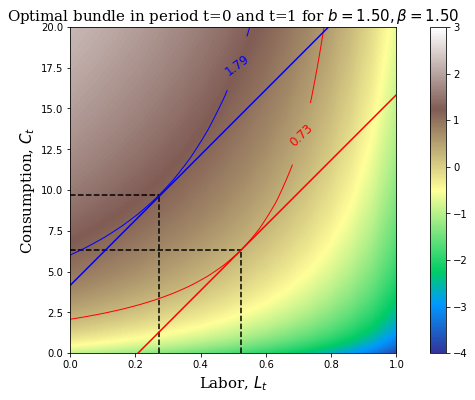

In [437]:
#We will now plot the budget constraint for t=0 and the indifference curve from earlier. 
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

#We define utility as the function as we did before
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
               vmin=-4, vmax=3, extent=(-0.1, 1.2, -1, 40), aspect=0.05)

#We plot the budget constraint. (See equation in notebook - Will be added.)
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W0 * labor_supply + (1 / (1 + r1)) * (W1 * L_1 - C_1),
        color='r')

#We plot the indifference curve
CS = ax.contour(L, C, utility, np.array([u_0]), colors='r', linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.2f', fontsize = 12)

# mark the optimal consumption and labor. 
ax.hlines(C_0, 0, L_0, linestyle='dashed')
ax.vlines(L_0, 0, C_0, linestyle='dashed')

#Plotting the second period in same graph
#We plot the second budget constraint.
labor_supply2 = np.linspace(0, 1, 100)
ax.plot(labor_supply2, (W1 * labor_supply2 + (W0 * L_0 - C_0)), color='b')

#We plot the second indifference curve
CS2 = ax.contour(L, C, utility, np.array([u_1]), colors='b', linewidths=1, linestyles='solid')
ax.clabel(CS2, inline=1, fmt='%1.2f', fontsize = 12)

# mark the optimal consumption and labor. 
ax.hlines(C_1, 0, L_1, linestyle='dashed')
ax.vlines(L_1, 0, C_1, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 20)
ax.set_ylabel(r'Consumption, $C_{t}$', family='serif', fontsize=15)
ax.set_xlabel(r'Labor, $L_{t}$', family='serif', fontsize=15)
ax.set_title(r'Optimal bundle in period t=0 and t=1 for $b=%.2f, \beta=%.2f$' %(b, beta), 
             fontsize=15, family='serif')
#ax.legend(loc=0, frameon=False)
fig.colorbar(im, shrink=1, aspect=20)

plt.show()

Again we see the division by zero, which we disregard.

- Red:  Period 0
- Blue: Period 1

We can here see graphically how the individual choose to have a low utility in the first period and higher in the latter, and thereby have the highest accumulative utility for both periods. The conclusion being, consumption and labor has to be lower in period 0 in this example, compared to the 1-period model. Given the parameter values chosen.

## Conclusion

In this project, we have programmed and analyzed the RBC model presented by David Romer, both a single- and two-period model where we determined the optimal bundles for both of these examples.

We looked at how the parameters affected the utility of the individual. Here we saw, that as b increases consumption increases as well and labor decreases. For theta, we saw that an increase caused consumption to increased and labor decreased. The patteren was the same for omega. 

In the case where the individual only took 1 period into account, the optimal bundle was (C, L) = (8.00, 0.40) giving a utility of 1.31.
Using the same parameter values, we analyzed the result of a 2-period mode, and saw that the individual now took both periods into account. The individual was (C, L) = (6.34, 0.52) with an utility of 0.73 in period 1, and (C, L) = (9.70, 0.27) with an utility of 1.79 in period 2. And thereby using the first period to have a lower utility and get a higher utility in the latter period.